# Brain Tumor Detection: Image Classification Using Deep Learning Techniques

The dataset is sourced from Kaggle; you can access it by following the provided link.

https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset

## Importing the Required Libraries

In [1]:
import cv2
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report

## Setting the path to Dataset

The dataset consists of two folders, "training" and "testing," each containing images of brain MRI scans categorized as Glioma, Meningioma, Notumor, and Pituitary.


We designate the paths to the two folders as variables named "training_set" and "testing_set".

In [2]:
training_set = r'Path\Brain Tumor Detection\Training'
testing_set = r'Path\Brain Tumor Detection\Testing'

## Defining the Input Size for images in Dataset

In [3]:
input_shape = (150, 150, 3)

## Building the Neural Network Architecture

In [4]:
# Initializing the Neural Network Model using Tensorflow and Keras
# This is an Alternative way of initializing the Neural Network
'''
from tf.keras.models import Sequential
model = Sequential()
'''

# I chose this line of code which in fact efficient to read and run
BTD = tf.keras.models.Sequential()

#BTD Stands for "Brain Tumor Detection"

### Group: 1

The initial layer comprises two convolutional layers, each equipped with 32 filters of size 3x3, and it reads input images with dimensions of 150x150 pixels and three RGB channels with activation function "ReLU".

Afterward, a pooling operation is applied, specifically employing max-pooling with a window size of 2x2.

In [5]:
BTD.add(Conv2D(32, (3,3), input_shape = input_shape, activation = 'relu'))
BTD.add(Conv2D(32, (3,3), input_shape = input_shape, activation = 'relu'))
BTD.add(MaxPooling2D(pool_size = (2,2)))

### Group: 2

Same as that of Layer: 1

In [6]:
BTD.add(Conv2D(32, (3, 3), input_shape = input_shape, activation = 'relu'))
BTD.add(Conv2D(32, (3, 3), input_shape = input_shape, activation = 'relu'))
BTD.add(MaxPooling2D(pool_size = (2, 2)))

### Group: 3

The later layers comprises three convolutional layers, each equipped with 64 filters of size 3x3, and it reads input images with dimensions of 150x150 pixels and three RGB channels with activation function "ReLU".

Afterward, a pooling operation is applied, specifically employing max-pooling with a window size of 2x2.

In [7]:
BTD.add(Conv2D(64, (3, 3), input_shape = input_shape, activation = 'relu'))
BTD.add(Conv2D(64, (3, 3), input_shape = input_shape, activation = 'relu'))
BTD.add(Conv2D(64, (3, 3), input_shape = input_shape, activation = 'relu'))
BTD.add(MaxPooling2D(pool_size = (2, 2)))

### Group: 4

Same as that of Layer: 3

In [8]:
BTD.add(Conv2D(64, (3, 3), input_shape = input_shape, activation = 'relu'))
BTD.add(Conv2D(64, (3, 3), input_shape = input_shape, activation = 'relu'))
BTD.add(Conv2D(64, (3, 3), input_shape = input_shape, activation = 'relu'))
BTD.add(MaxPooling2D(pool_size = (2, 2)))

### Group: 5

Flattening layer

In [9]:
BTD.add(Flatten())

### Group: 6 ANN Architecture

The structure of the Artificial Neural Network includes layers with the following neuron counts: 512, 256, a dropout layer, 128, and 64, each utilizing the ReLU activation function. The final layer comprises 4 neurons with the Softmax activation function.

The dropout layer is used in neural networks as a regularization technique to prevent overfitting.

we use Softmax at the end of a neural network when we want the model to predict multi-class classification problems.

In [10]:
BTD.add(Dense(512, activation = 'relu'))
BTD.add(Dense(256, activation = 'relu'))

# Dropout layer with droupout rate set to 0.5
BTD.add(Dropout(0.5))
BTD.add(Dense(128, activation = 'relu'))
BTD.add(Dense(64, activation = 'relu'))
BTD.add(Dense(4, activation = 'softmax'))

# Compiling the Neural Network
BTD.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

## Summary of the Model

In [11]:
BTD.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 73, 73, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 32)        9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 34, 34, 32)        0         
 g2D)                                                   

## Data Augmentation

The use of the ImageDataGenerator with various transformation parameters, such as rotation, shifting, shearing, zooming, and flipping, constitutes a technique known as "data augmentation." Data augmentation is a common practice in machine learning, especially in computer vision tasks like image classification.

This data generator helps improve the model's generalization by creating variations of the training images, making the model more robust to different orientations, shifts, shears, zooms, and flips.

In [12]:
image_data_generator = ImageDataGenerator(rescale = 1./255,
                                          rotation_range = 40,
                                          height_shift_range = 0.2,
                                          width_shift_range = 0.2,
                                          shear_range = 0.2,
                                          zoom_range = 0.2, 
                                          horizontal_flip = True,
                                          fill_mode = 'nearest')

In [13]:
# Data augmentation is applied to training images using a batch size of 32, and the order of images is randomized
# The images will undergo resizing to dimensions of (150, 150)
# Since this is a categorical classification problem, the class mode is set to 'categorical'
# The labels will be one-hot encoded

training_images = image_data_generator.flow_from_directory(training_set,
                                                           batch_size = 32,
                                                           target_size = (150,150),
                                                           shuffle = True,
                                                           class_mode = 'categorical')

Found 5712 images belonging to 4 classes.


In [14]:
testing_images = image_data_generator.flow_from_directory(testing_set,
                                                          batch_size = 1,
                                                          target_size = (150,150),
                                                          shuffle = False,
                                                          class_mode = 'categorical')

Found 1311 images belonging to 4 classes.


## Early Stop Function

The purpose of this callback is to monitor the validation loss during the training of a neural network. If the validation loss does not improve for a certain number of consecutive epochs (specified by the patience parameter, set to 3 in this case), training will be stopped early to prevent overfitting and save computational resources.

In [15]:
# The provided code does not include a predefined minimum accuracy level for terminating the training
# Rather, it stops training after detecting three consecutive instances where their no improvement in accuracy
'''
from tf.keras.callbacks import EarlyStopping
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 3)
'''

# This stops training if the accuracy remains above 0.85 for three consecutive epochs
class StopTrainingOnLowValidationAccuracy(tf.keras.callbacks.Callback):
    def __init__(self, threshold = 0.85, patience = 4):
        super(StopTrainingOnLowValidationAccuracy, self).__init__()
        self.threshold = threshold
        self.patience = patience
        self.counter = 0

    def on_epoch_end(self, epoch, logs = None):
        if logs['val_accuracy'] is not None and logs['val_accuracy'] > self.threshold:
            self.counter += 1
            if self.counter >= self.patience:
                print("\n")
                print(f"\nStopping training as validation accuracy ({logs['val_accuracy']:.4f}) has been above {self.threshold} for {self.patience} consecutive epochs.")
                self.model.stop_training = True
        else:
            self.counter = 0

custom_callback = StopTrainingOnLowValidationAccuracy(threshold = 0.85, patience = 4)

## Training the Model

The model undergoes training on the complete dataset, encompassing 179 batches, across 60 epochs while utilizing a custom callback function.

In [16]:
BTD.fit(training_images,
        epochs = 60,
        steps_per_epoch = len(training_images),
        validation_data = testing_images,
        callbacks = [custom_callback])

Epoch 1/60


179/179 [==============================] - 196s 1s/step - loss: 1.2099 - accuracy: 0.4030 - val_loss: 1.0970 - val_accuracy: 0.4729
Epoch 2/60
179/179 [==============================] - 168s 937ms/step - loss: 1.0941 - accuracy: 0.4667 - val_loss: 1.1538 - val_accuracy: 0.4455
Epoch 3/60
179/179 [==============================] - 195s 1s/step - loss: 1.0353 - accuracy: 0.4925 - val_loss: 1.0423 - val_accuracy: 0.5034
Epoch 4/60
179/179 [==============================] - 183s 1s/step - loss: 1.0133 - accuracy: 0.5077 - val_loss: 1.0028 - val_accuracy: 0.5126
Epoch 5/60
179/179 [==============================] - 161s 897ms/step - loss: 1.0100 - accuracy: 0.5166 - val_loss: 0.9926 - val_accuracy: 0.5133
Epoch 6/60
179/179 [==============================] - 194s 1s/step - loss: 0.9705 - accuracy: 0.5648 - val_loss: 1.0251 - val_accuracy: 0.5530
Epoch 7/60
179/179 [==============================] - 188s 1s/step - loss: 0.9522 - accuracy: 0.5847 - val_loss: 0.9296 - val_accuracy

## Plotting the Curves

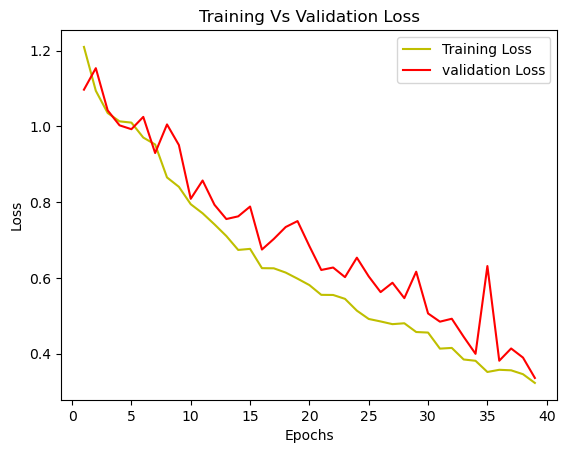

In [17]:
# Training Loss Vs Validation Loss
# I have mentioned two different ways to plot the graphs, please take a look on both
loss = BTD.history.history['loss']
val_loss = BTD.history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label = 'Training Loss')
plt.plot(epochs, val_loss, 'r', label = 'validation Loss')
plt.title('Training Vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

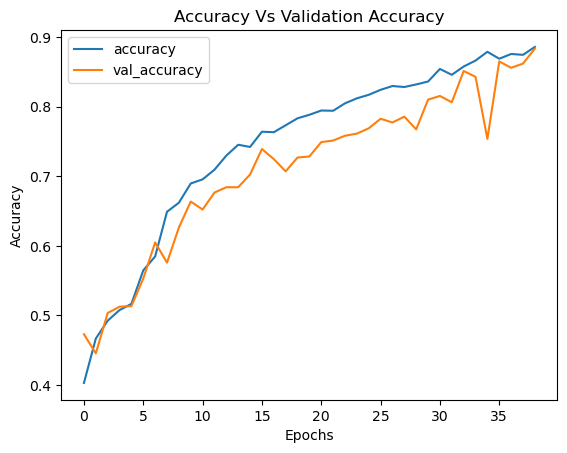

In [18]:
# Accuracy Vs Validation Accuracy
# This is other way of plotting the plot
losses = pd.DataFrame(BTD.history.history)
losses[['accuracy','val_accuracy']].plot()
plt.title('Accuracy Vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Evalutation of the Model

In [19]:
predictions = BTD.predict(testing_images)
print(predictions)

1311/1311 [==============================] - 38s 28ms/step
[[4.8966485e-01 2.2285303e-01 3.2756399e-02 2.5472569e-01]
 [6.8941313e-01 9.1269553e-02 2.9822949e-02 1.8949436e-01]
 [9.9904841e-01 4.9758481e-04 2.8131870e-05 4.2583395e-04]
 ...
 [2.1412963e-04 1.7194409e-02 1.0982430e-04 9.8248166e-01]
 [5.5459882e-03 2.0138659e-01 7.5827343e-03 7.8548467e-01]
 [2.4154529e-02 5.0992358e-02 9.8257363e-03 9.1502732e-01]]


The accuracy hovers around 80%. The model exhibits good performance on the testing set, accurately predicting the majority of the images, as evident from the results below.

In [20]:
print(BTD.evaluate(testing_images))

1311/1311 [==============================] - 37s 28ms/step - loss: 0.3366 - accuracy: 0.8894
[0.33659791946411133, 0.889397382736206]


In [21]:
# Predicting the class of each image in testing dataset
predicted_classes = np.argmax(predictions, axis=1)
class_labels = ['Glioma', 'Meningioma', 'No Tumor', 'Pituitary']
predicted_class_labels = [class_labels[i] for i in predicted_classes]

for i, predicted_label in enumerate(predicted_class_labels):
    print(f"Image {i + 1}: Predicted Class - {predicted_label}")

Image 1: Predicted Class - Glioma
Image 2: Predicted Class - Glioma
Image 3: Predicted Class - Glioma
Image 4: Predicted Class - Pituitary
Image 5: Predicted Class - Glioma
Image 6: Predicted Class - Glioma
Image 7: Predicted Class - Glioma
Image 8: Predicted Class - Glioma
Image 9: Predicted Class - Glioma
Image 10: Predicted Class - Glioma
Image 11: Predicted Class - Glioma
Image 12: Predicted Class - Pituitary
Image 13: Predicted Class - Glioma
Image 14: Predicted Class - Glioma
Image 15: Predicted Class - Glioma
Image 16: Predicted Class - Pituitary
Image 17: Predicted Class - Glioma
Image 18: Predicted Class - Glioma
Image 19: Predicted Class - Glioma
Image 20: Predicted Class - Glioma
Image 21: Predicted Class - Glioma
Image 22: Predicted Class - Glioma
Image 23: Predicted Class - Glioma
Image 24: Predicted Class - Glioma
Image 25: Predicted Class - Glioma
Image 26: Predicted Class - Glioma
Image 27: Predicted Class - Glioma
Image 28: Predicted Class - Glioma
Image 29: Predicted 

## Testing on Single Image

In [22]:
# Categorizing the image into this classes
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    print(f"Original Image Shape: {img.shape}")
    img = cv2.resize(img, (150, 150))
    print(f"Resized Image Shape: {img.shape}")
    img = img / 255.0
    img = np.expand_dims(img, axis = 0)
    return img

def predict_image_class(image_path):
    processed_image = preprocess_image(image_path)
    prediction = BTD.predict(processed_image)
    predicted_class = np.argmax(prediction, axis=1)[0]
    return predicted_class

image_path_to_predict = r'Path\Brain Tumor Detection\Testing\notumor\Te-no_0045.jpg'
predicted_class = predict_image_class(image_path_to_predict)
print(f"The predicted class Number: {predicted_class}")
print("\n")

# Mapping class numbers to class labels
class_mapping = {
    0: 'Glioma',
    1: 'Meningioma',
    2: 'No Tumor',
    3: 'Pituitary'
}
predicted_class_label = class_mapping[predicted_class]
print(f"The predicted class is: {predicted_class_label}")

Original Image Shape: (251, 236, 3)
Resized Image Shape: (150, 150, 3)
1/1 [==============================] - 0s 283ms/step
The predicted class Number: 2


The predicted class is: No Tumor


## Confusion Matrix

Found 1311 images belonging to 4 classes.
Total number of samples: 1311


Number of batches: 40
40/40 [==============================] - 9s 218ms/step
40 Batches are processed


Number of batches: 41
41/41 [==============================] - 9s 224ms/step
41 Batches are processed (Same Batches)


Number of batches: 41
41/41 [==============================] - 9s 215ms/step
41 Batches are processed (Same Batches)


True Labels: 1311
Predicted Labels: 1311


First Matrix is Normalized Confusion Matrix

Second Confusion Matrix is Without Normalization


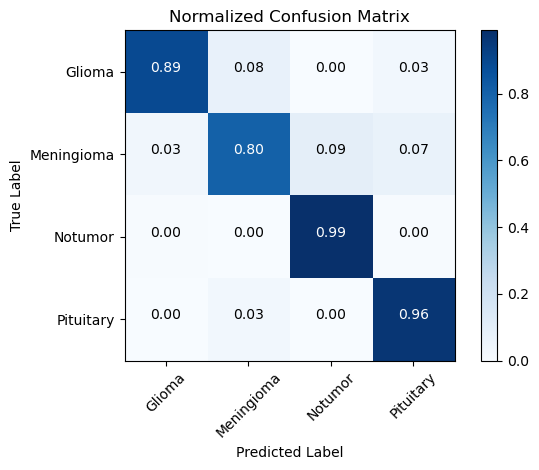

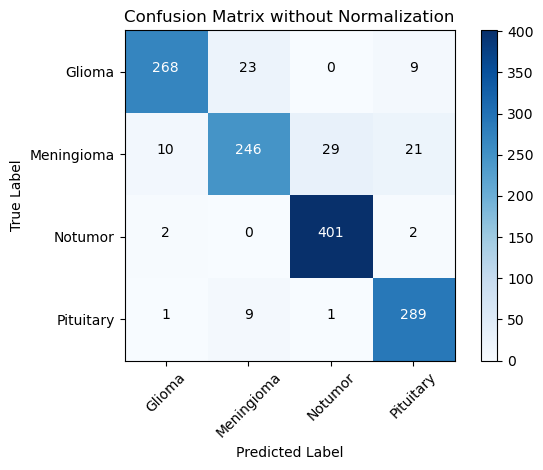

In [23]:
test_datagen = ImageDataGenerator(rescale=1./255)  
test_generator = test_datagen.flow_from_directory(
    testing_set,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',  
    shuffle=False  
)

true_labels = test_generator.classes
num_samples = len(true_labels)

num_batches = num_samples // test_generator.batch_size
print("Total number of samples:", num_samples)
print("\n")

print("Number of batches:", num_batches)
predictions = BTD.predict(test_generator, steps = num_batches, verbose = 1)
# When verbose = 1, it will show a progress bar during the prediction
print("40 Batches are processed")
print("\n")
print("Number of batches:", num_batches + 1)
predictions = BTD.predict(test_generator, steps = num_batches + 1, verbose = 1)
print("41 Batches are processed (Same Batches)")
print("\n")
print("Number of batches:", num_batches + 1)
predictions = BTD.predict(test_generator, steps = num_samples // test_generator.batch_size + 1, verbose = 1)
predicted_labels = np.argmax(predictions, axis = 1)
print("41 Batches are processed (Same Batches)")
print("\n")

actual_label = len(true_labels)
pred_label = len(predicted_labels) 
print(f"True Labels: {actual_label}\nPredicted Labels: {pred_label}")
cm = confusion_matrix(true_labels, predicted_labels)
class_names = ["Glioma", "Meningioma", "Notumor", "Pituitary"]

def plot_confusion_matrix(cm, classes, normalize = False, title = 'Confusion matrix', cmap = plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
        print("\n")
        print("First Matrix is Normalized Confusion Matrix\n")
    else:
        print('Second Confusion Matrix is Without Normalization')

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()

plt.figure()
plot_confusion_matrix(cm, classes = class_names, normalize = True, title='Normalized Confusion Matrix')

plt.figure()
plot_confusion_matrix(cm, classes = class_names, normalize = False, title = 'Confusion Matrix without Normalization')

plt.show()

## Calculating the F1 Score

The F1 score is unnecessary because the dataset is balanced, containing approximately 1300 samples for each of the four categories in the training set and 600 samples in the testing set.

F1 score is calculated for reference, regardless of whether the imbalance is present in the training dataset, testing dataset, or both.

In [24]:
from sklearn.metrics import f1_score
f1 = f1_score(true_labels, predicted_labels, average = 'weighted')

print(f"F1 Score: {f1:.4f}")

F1 Score: 0.9171
